# **What if you invested $200 every month in the S&P 500 for the last 10 years?**

In [32]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

In [20]:
# get sp500 data for the last 10 years
sp500 = yf.download("^GSPC", start="2014-04-01", end="2024-04-30", interval="1mo")
sp500 = sp500[['Close']].dropna()
sp500.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [21]:
sp500

Price,Date,Close
Ticker,,^GSPC
0,2014-04-01,1883.949951
1,2014-05-01,1923.569946
2,2014-06-01,1960.229980
3,2014-07-01,1930.670044
4,2014-08-01,2003.369995
...,...,...
116,2023-12-01,4769.830078
117,2024-01-01,4845.649902
118,2024-02-01,5096.270020


In [25]:
for i, r in sp500.iterrows():
    print(r['Date'][0], r['Close'][0])

2014-04-01 00:00:00 1883.949951171875
2014-05-01 00:00:00 1923.5699462890625
2014-06-01 00:00:00 1960.22998046875
2014-07-01 00:00:00 1930.6700439453125
2014-08-01 00:00:00 2003.3699951171875
2014-09-01 00:00:00 1972.2900390625
2014-10-01 00:00:00 2018.050048828125
2014-11-01 00:00:00 2067.56005859375
2014-12-01 00:00:00 2058.89990234375
2015-01-01 00:00:00 1994.989990234375
2015-02-01 00:00:00 2104.5
2015-03-01 00:00:00 2067.889892578125
2015-04-01 00:00:00 2085.510009765625
2015-05-01 00:00:00 2107.389892578125
2015-06-01 00:00:00 2063.110107421875
2015-07-01 00:00:00 2103.840087890625
2015-08-01 00:00:00 1972.1800537109375
2015-09-01 00:00:00 1920.030029296875
2015-10-01 00:00:00 2079.360107421875
2015-11-01 00:00:00 2080.409912109375
2015-12-01 00:00:00 2043.93994140625
2016-01-01 00:00:00 1940.239990234375
2016-02-01 00:00:00 1932.22998046875
2016-03-01 00:00:00 2059.739990234375
2016-04-01 00:00:00 2065.300048828125
2016-05-01 00:00:00 2096.949951171875
2016-06-01 00:00:00 2098.8

<ipython-input-25-cd4c6e0389f2>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(r['Date'][0], r['Close'][0])


In [26]:
# stimulate monthly investments
initial_investment = 200
shares_purchased = []
total_shares = 0
portfolio_value = []
for i, r in sp500.iterrows():
    price = r['Close'][0]
    shares = initial_investment / price
    total_shares += shares
    value = total_shares * price

    shares_purchased.append(shares)
    portfolio_value.append(value)

sp500['Shares Purchased'] = shares_purchased
sp500['Portfolio Value'] = portfolio_value

<ipython-input-26-4eca1d9314c2>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price = r['Close'][0]


In [27]:
sp500

Price,Date,Close,Shares Purchased,Portfolio Value
Ticker,,^GSPC,,
0,2014-04-01,1883.949951,0.106160,200.000000
1,2014-05-01,1923.569946,0.103973,404.206056
2,2014-06-01,1960.229980,0.102029,611.909549
3,2014-07-01,1930.670044,0.103591,802.682057
4,2014-08-01,2003.369995,0.099832,1032.907287
...,...,...,...,...
116,2023-12-01,4769.830078,0.041930,39877.670033
117,2024-01-01,4845.649902,0.041274,40711.553816
118,2024-02-01,5096.270020,0.039244,43017.181460


In [ ]:
# set font
inter_font_path = '/content/Inter_font.ttf'
inter_font = fm.FontProperties(fname=inter_font_path)

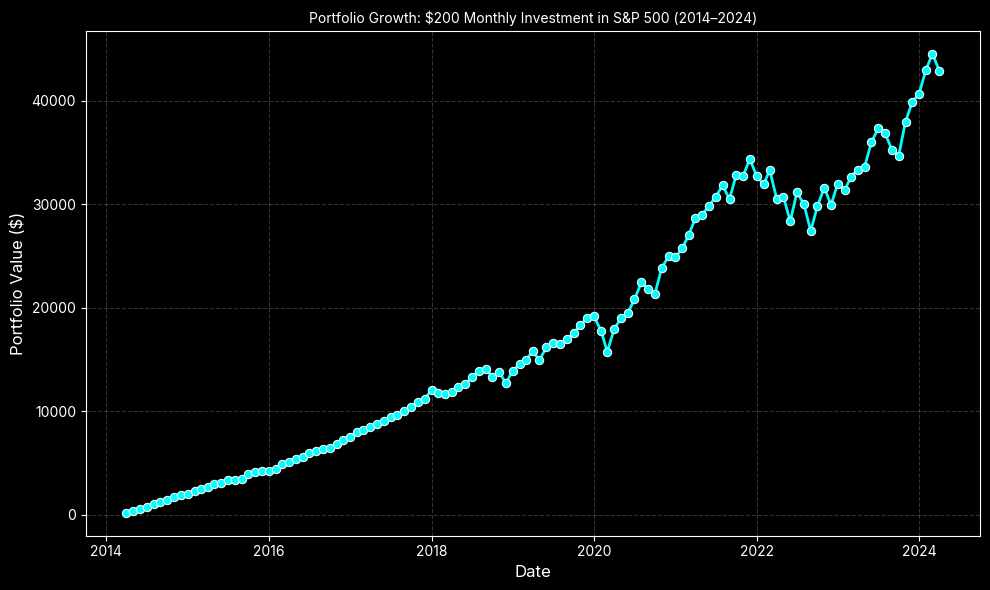

In [44]:
# visualize growth overtime
plt.figure(figsize=(10, 6))
sns.lineplot(data=sp500, x='Date', y='Portfolio Value', marker='o', linewidth=2, color='cyan')
plt.title('Portfolio Growth: $200 Monthly Investment in S&P 500 (2014–2024)',
          fontsize=16, fontproperties=inter_font, color='white')

plt.xlabel('Date', fontsize=12, fontproperties=inter_font)
plt.ylabel('Portfolio Value ($)', fontsize=12, fontproperties=inter_font)

plt.xticks(fontproperties=inter_font)
plt.yticks(fontproperties=inter_font)

plt.grid(visible=True, linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()


Calculate Metrics

In [48]:
# Total invested
total_invested = initial_investment * len(sp500)

# Final portfolio value
final_portfolio_value = sp500['Portfolio Value'].iloc[-1]

# ROI
roi = (final_portfolio_value - total_invested) / total_invested * 100

print(f'Total invested: ${total_invested:.2f}')
print(f'Final portfolio value: ${final_portfolio_value:.2f}')
print(f'Return on investment: {roi:.2f}%')

Total invested: $24200.00
Final portfolio value: $42897.51
Return on investment: 77.26%
